![EvalML Logo](images/evalml_logo.png)


# What is EvalML?
EvalML is an AutoML library that builds, optimizes, and evaluates machine learning pipelines using domain-specific objective functions. 

Combined with [Featuretools](https://featuretools.featurelabs.com) and [Compose](https://compose.featurelabs.com), EvalML can be used to create end-to-end machine learning solutions for classification and regression problems. 

# Quick Start

In [1]:
import evalml
from evalml import AutoMLSearch

## Load Data

First, we load in the features and outcomes we want to use to train our model.

In [2]:
X, y = evalml.demos.load_breast_cancer()

## Configure search

EvalML has many options to configure the pipeline search. At the minimum, we need to define an objective function. For simplicity, we will use the F1 score in this example. However, the real power of EvalML is in using domain-specific [objective functions](objectives/overview.ipynb) or [building your own](objectives/custom_objectives.ipynb).

Below EvalML utilizes Bayesian optimization (EvalML's default optimizer) to search and find the best pipeline defined by the given objective.

In [3]:
automl = AutoMLSearch(problem_type="binary",
                      objective="f1",
                      max_pipelines=5)

In order to validate the results of the pipeline creation and optimization process, we will save some of our data as a holdout set.

In [4]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, test_size=.2)

When we call `.search()`, the search for the best pipeline will begin. There is no need to wrangle with missing data or categorical variables as EvalML includes various preprocessing steps (like imputation, one-hot encoding, feature selection) to ensure you're getting the best results. As long as your data is in a single table, EvalML can handle it. If not, you can reduce your data to a single table by utilizing [Featuretools](https://featuretools.featurelabs.com) and its Entity Sets.

You can find more information on pipeline components and how to integrate your own custom pipelines into EvalML [here](pipelines/custom_pipelines.ipynb).

In [5]:
automl.search(X_train, y_train)

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1. 
Greater score is better.

Searching up to 5 pipelines. 
Allowed model families: linear_model, catboost, random_forest, xgboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

(1/5) Mode Baseline Binary Classification P... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean F1: 0.770
(2/5) CatBoost Classifier w/ Simple Imputer    Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean F1: 0.973
(3/5) XGBoost Classifier w/ Simple Imputer     Elapsed:00:05
	Starting cross validation
	Finished cross validation - mean F1: 0.967
(4/5) Random Forest Classifier w/ Simple Im... Elapsed:00:05
	Starting cross validation
	Finished cross validation - mean F1: 0.967
(5/5) Logistic Regression Classifier w/ Sim... Elapsed:00:06
	Starting cross validation
	Finished cross validation - mean F1: 0.979

Search finished after 00:07            
Best pipeline: Logistic Regression Classifier w/ Simple Imputer + Standard Scaler
Best pipeline F1: 0.979111


## See Pipeline Rankings

After the search is finished we can view all of the pipelines searched, ranked by score. Internally, EvalML performs cross validation to score the pipelines. If it notices a high variance across cross validation folds, it will warn you. EvalML also provides additional [data checks](data_checks/data_checks_in_automl.ipynb) to analyze your data to assist you in producing the best performing pipeline. 

In [6]:
automl.rankings

,id,pipeline_name,score,high_variance_cv,parameters
0,4,Logistic Regression Classifier w/ Simple Imput...,0.979111,False,{'Simple Imputer': {'impute_strategy': 'most_f...
1,1,CatBoost Classifier w/ Simple Imputer,0.972574,False,{'Simple Imputer': {'impute_strategy': 'most_f...
2,3,Random Forest Classifier w/ Simple Imputer,0.966931,False,{'Simple Imputer': {'impute_strategy': 'most_f...
3,2,XGBoost Classifier w/ Simple Imputer,0.966892,False,{'Simple Imputer': {'impute_strategy': 'most_f...
4,0,Mode Baseline Binary Classification Pipeline,0.770273,False,{'Baseline Classifier': {'strategy': 'random_w...


## Describe pipeline

If we are interested in see more details about the pipeline, we can describe it using the `id` from the rankings table:

In [7]:
automl.describe_pipeline(3)

**********************************************
* Random Forest Classifier w/ Simple Imputer *
**********************************************

Problem Type: Binary Classification
Model Family: Random Forest

Pipeline Steps
1. Simple Imputer
	 * impute_strategy : most_frequent
	 * fill_value : None
2. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for Binary Classification problems.
Total training time (including CV): 0.6 seconds

Cross Validation
----------------
               F1  Accuracy Binary  Balanced Accuracy Binary  Precision   AUC  Log Loss Binary  MCC Binary # Training # Testing
0           0.927            0.908                     0.898      0.918 0.977            0.184       0.802    303.000   152.000
1           0.984            0.980                     0.981      0.989 0.997            0.099       0.958    303.000   152.000
2           0.990            0.987                     0.982      0.979 0.989            0.121 

## Select Best pipeline
We can now select best pipeline and score it on our holdout data:

In [8]:
pipeline = automl.best_pipeline
pipeline.fit(X_train, y_train)
pipeline.score(X_holdout, y_holdout, ["f1"])

OrderedDict([('F1', 0.9726027397260274)])

We can also visualize the structure of our pipeline:

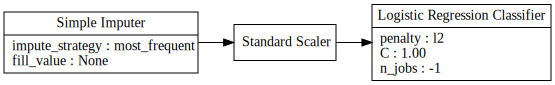

In [9]:
pipeline.graph()

## Whats next?

Head into the more in-depth automated walkthrough [here](automl/pipeline_search.ipynb) or any advanced topics below.

# Getting Started
[What is EvalML](self)

[Installation](install)

# Objective functions

[Overview](objectives/overview)

[Fraud Prediction](demos/fraud)

[Lead Scoring](demos/lead_scoring)

[Defining Custom Objectives](objectives/custom_objectives)

# Automated Machine Learning

[Setting up pipeline search](automl/pipeline_search)

[Exploring search results](automl/search_results)

[Regression Example](automl/regression_example)

[Overfitting Protection](automl/overfitting_protection)

# Pipelines and Components

[Components](pipelines/components)

[Custom Pipelines](pipelines/custom_pipelines)

# Data Checks

[Overview](data_checks/data_checks_overview)

[Using Data Checks in AutoML](data_checks/data_checks_in_automl)

# Resources
[Changelog](changelog)

[API Reference](api_reference)

[FAQ](faq)